# <font style = "color:rgb(50,120,229)">Implementation of Morphological Operations</font>
We had discussed how to use dilation and erosion operations in the previous section. In this section, we will see what is going on under the hood. The most important concept that you need to understand is the Structuring element. We will discuss about the structuring element and how it is used for performing these morphological operations.

## <font style="color:rgb(50,120,229)">Implement Method 2</font>
1. Scan through the image and superimpose the kernel on the neighborhood of each pixel. 
1. Perform an AND operation of the neighborhood with the kernel.
1. Replace the pixel value with the `maximum` value in the neighborhood given by the kernel. 

This means that you check every pixel and its neighborhood with respect to the kernel and change the pixel to white if any of the pixel in this neighborhood is white. OpenCV implements an optimized version of this method. This will work even if the image is not a binary image.

## <font style="color:rgb(50,120,229)">Import Libraries </font>

In [1]:
import cv2
import numpy as np
DATA_PATH = './data/'
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Create a Demo Image</font>
## <font style="color:rgb(50,120,229)">Create an empty matrix </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


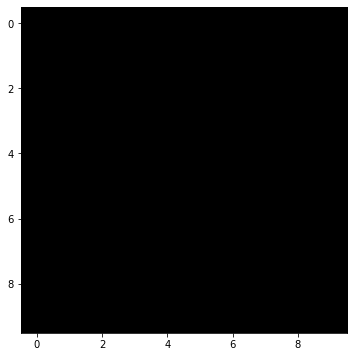

In [3]:
im = np.zeros((10,10),dtype='uint8')
print(im)
plt.imshow(im)
plt.show()

## <font style="color:rgb(50,120,229)">Lets add some white blobs</font>

We have added the blobs at different places so that all boundary cases are covered in this example.

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


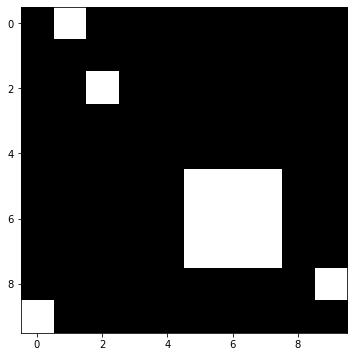

In [4]:
im[0, 1] = 1
im[-1, 0]= 1
im[-2, -1]=1
im[2, 2] = 1
im[5:8, 5:8] = 1

print(im)
plt.imshow(im)
plt.show()

This becomes our demo Image for illustration purpose

## <font style="color:rgb(50,120,229)">Create an Ellipse Structuring Element </font>
Let us create a 3x3 ellipse structuring element.

In [5]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
print(element)
print(element.shape)

[[0 1 0]
 [1 1 1]
 [0 1 0]]
(3, 3)


In [6]:
ksize = element.shape[0]
print(ksize)

3


In [7]:
print(im.shape)
height, width = im.shape[:2]
print('height =', height)
print('width =', width)

(10, 10)
height = 10
width = 10


## <font style="color:rgb(50,120,229)">First check the correct output using cv2.dilate</font>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


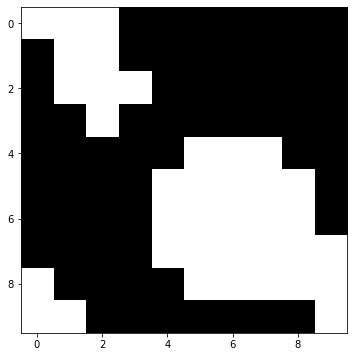

In [8]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)
plt.show()

## <font style="color:rgb(50,120,229)">Write Code for Dilation from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`dilationScratch.avi`** and display it using markdown below:

**`dilationScratch.avi` will come here**  
<video width="320" height="240" controls>
  <source src="dilationScratch.mp4" type="video/mp4">
</video>

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

In [9]:
# How many lines to add on top / left / bottom / right to make sure the kernel runs correctly
# Kernel starts at the top left.
# kernel do no padding (like in CNN)
border = ksize//2
print(border)
print()

# Create the padded Image with zeros
paddedIm = np.zeros((height + border*2, width + border*2))
print(paddedIm.shape)
print(paddedIm)
print()

# Copy the original image inside the padded image with zeros
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
print(paddedIm.shape)
print(paddedIm)
print()

# Create a copy of the filled padded image
paddedDilatedIm = paddedIm.copy()
print(paddedDilatedIm.shape)
print(paddedDilatedIm)
print()

1

(12, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

(12, 12)
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

(12, 12)
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 

Coloring white pixel @ 1, 1


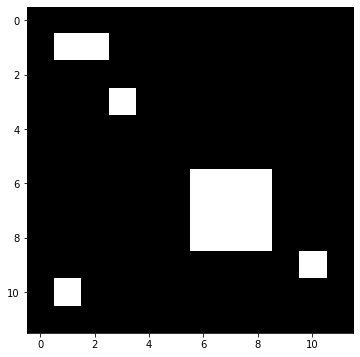

Coloring white pixel @ 3, 1


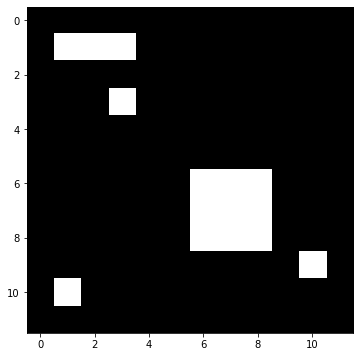

Coloring white pixel @ 2, 2


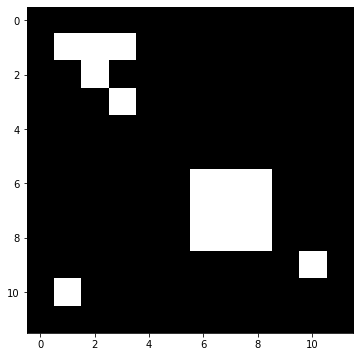

Coloring white pixel @ 3, 2


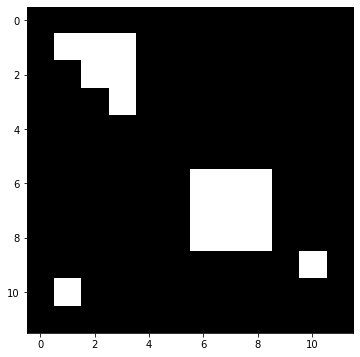

Coloring white pixel @ 2, 3


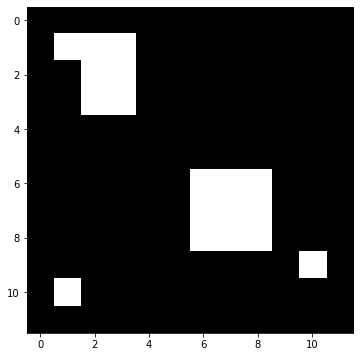

Coloring white pixel @ 4, 3


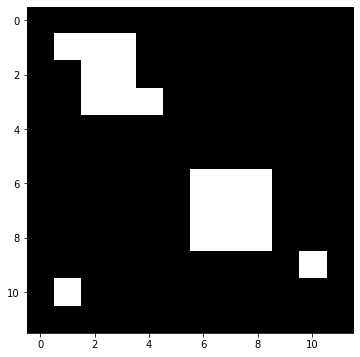

Coloring white pixel @ 3, 4


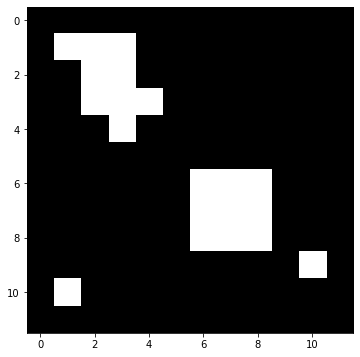

Coloring white pixel @ 6, 5


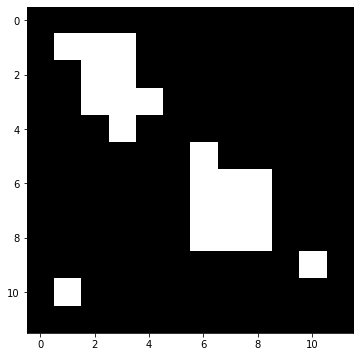

Coloring white pixel @ 7, 5


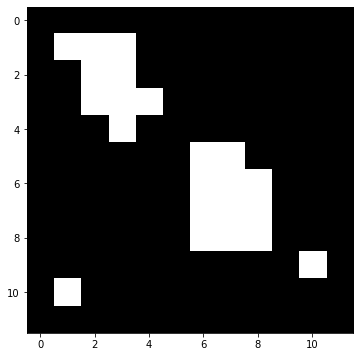

Coloring white pixel @ 8, 5


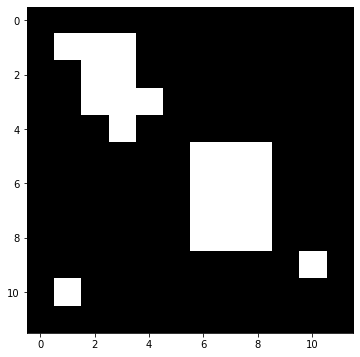

Coloring white pixel @ 5, 6


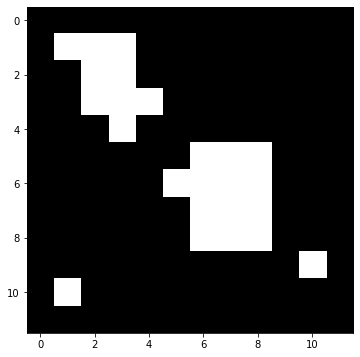

Coloring white pixel @ 6, 6


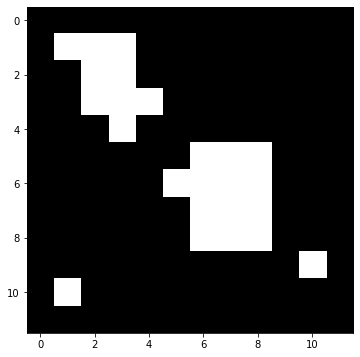

Coloring white pixel @ 7, 6


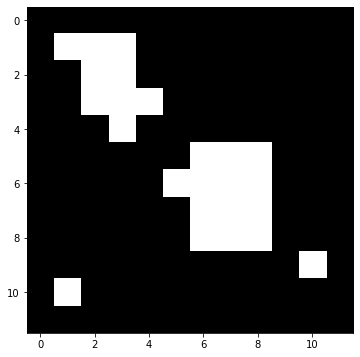

Coloring white pixel @ 8, 6


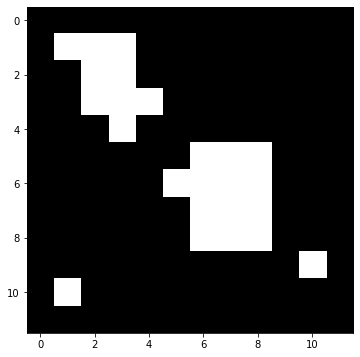

Coloring white pixel @ 9, 6


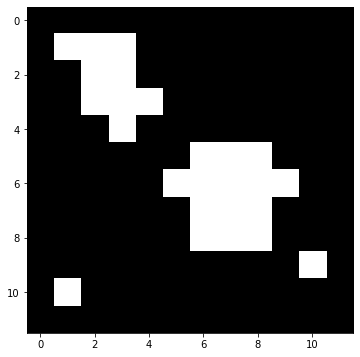

Coloring white pixel @ 5, 7


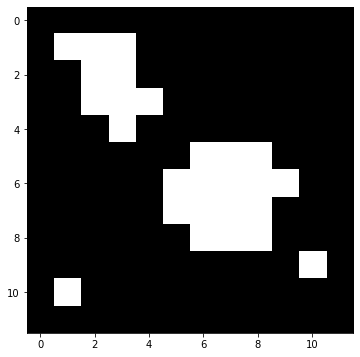

Coloring white pixel @ 6, 7


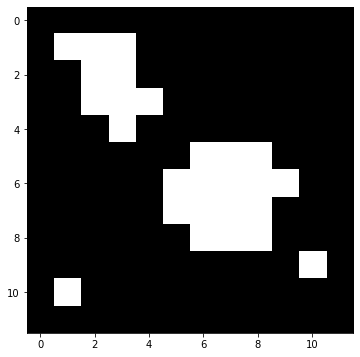

Coloring white pixel @ 7, 7


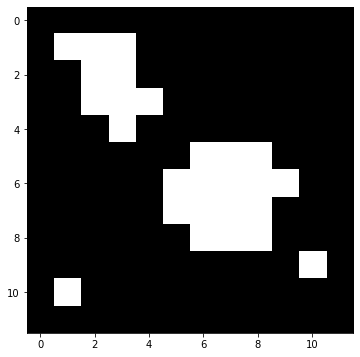

Coloring white pixel @ 8, 7


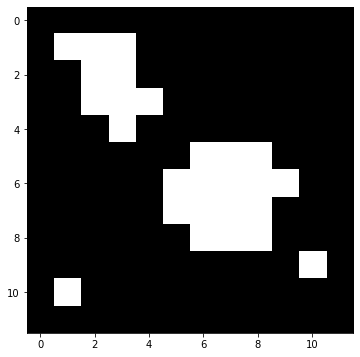

Coloring white pixel @ 9, 7


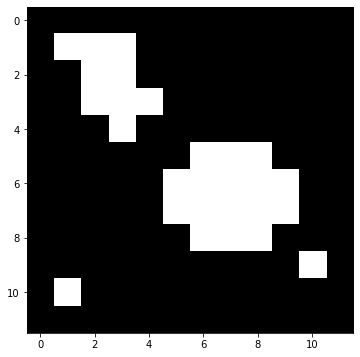

Coloring white pixel @ 5, 8


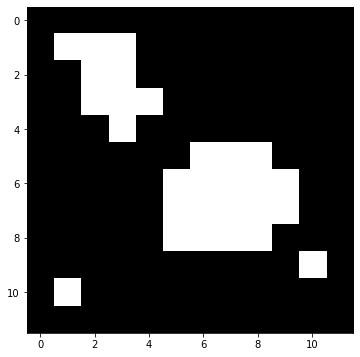

Coloring white pixel @ 6, 8


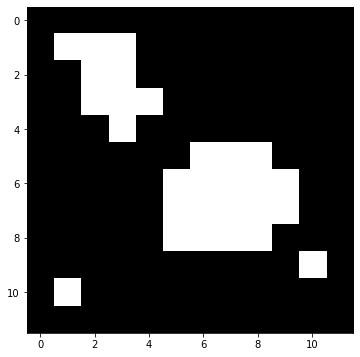

Coloring white pixel @ 7, 8


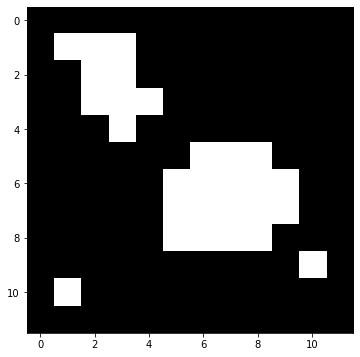

Coloring white pixel @ 8, 8


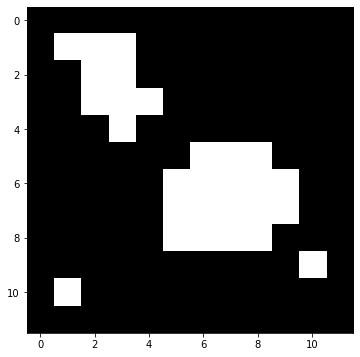

Coloring white pixel @ 9, 8


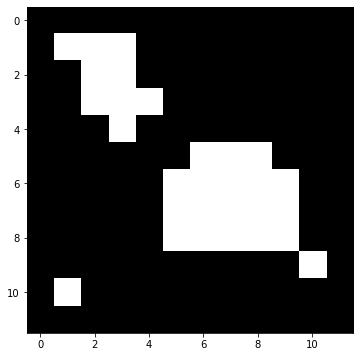

Coloring white pixel @ 10, 8


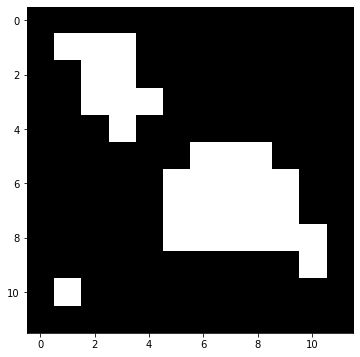

Coloring white pixel @ 1, 9


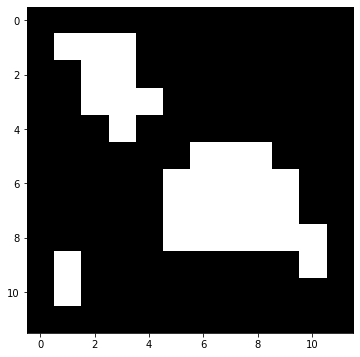

Coloring white pixel @ 6, 9


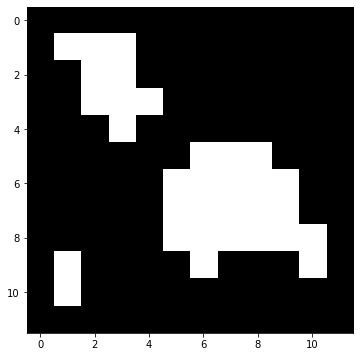

Coloring white pixel @ 7, 9


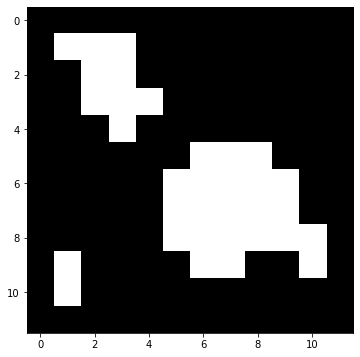

Coloring white pixel @ 8, 9


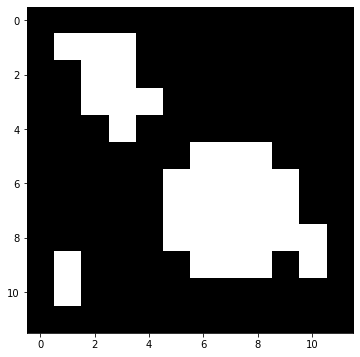

Coloring white pixel @ 9, 9


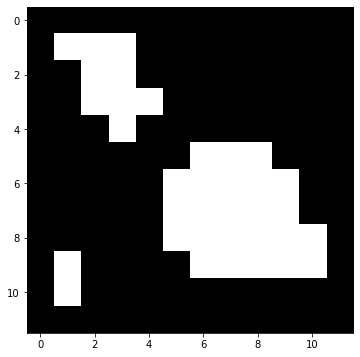

Coloring white pixel @ 2, 10


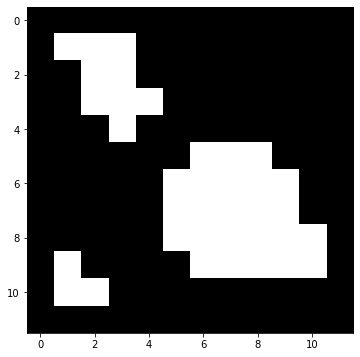

Coloring white pixel @ 10, 10


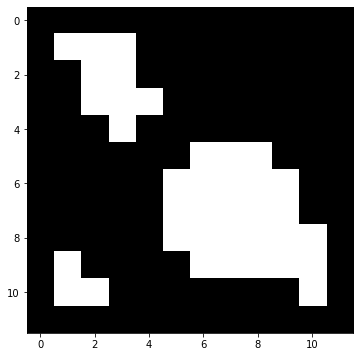

Final Padded Picture


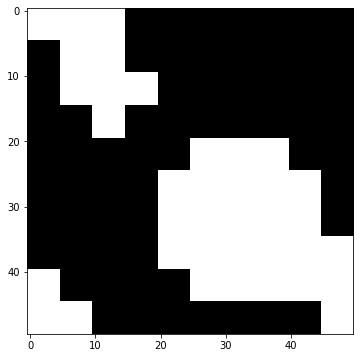

In [10]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
paddedDilatedIm = paddedIm.copy()

target_heigth, target_width = 50, 50

# Create a VideoWriter object
codec = cv2.VideoWriter_fourcc('M','J','P','G')
# codec = cv2.VideoWriter_fourcc(*'mp4v')
# codec = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')

width_vieo, height_video = (target_width, target_heigth)
fps = 10
out = cv2.VideoWriter('dilationScratch.avi', codec, fps, (width_vieo, height_video))

for h_i in range(border, height+border):        # from 1 to 11
    for w_i in range(border, width+border):     # from 1 to 11
        
        top = paddedIm[h_i-1, w_i]
        right = paddedIm[h_i, w_i+1]
        buttom = paddedIm[h_i+1, w_i]
        left = paddedIm[h_i, w_i-1]
        
        if max(top, right, buttom, left) == 1:
            print('Coloring white pixel @ {}, {}'.format(w_i, h_i))
            paddedDilatedIm[h_i, w_i] = 1
            plt.imshow(paddedDilatedIm)
            plt.show()

        # Select the frame (without borders)
        image = paddedDilatedIm[border:height+border, border:width+border]
        
        # Resize output to 50x50 before writing it to the video
        image = cv2.resize(image, (target_heigth, target_width), interpolation=cv2.INTER_NEAREST)
        
        # Convert resizedFrame to BGR
        image = cv2.cvtColor(image*255, cv2.COLOR_GRAY2BGR)
    
        # Write out the array
        out.write(image)            

# Release the VideoWriter object
print('Final Padded Picture')
plt.imshow(image)
plt.show()
out.release()

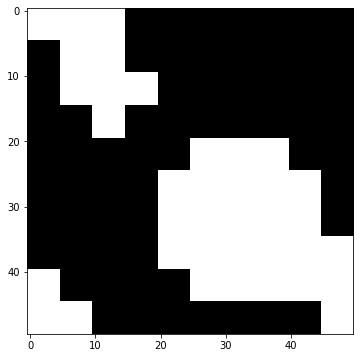

In [11]:
# Display final image (cropped)
plt.imshow(image)
plt.show()

# <font style="color:rgb(50,120,229)">Implement Erosion </font>

## <font style="color:rgb(50,120,229)">Check the correct output using cv2.erode </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


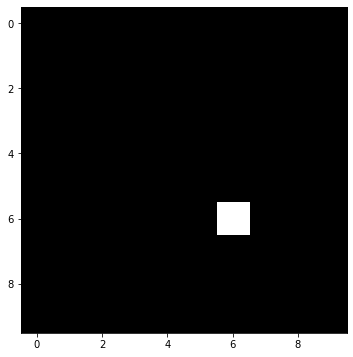

In [12]:
ErodedEllipseKernel = cv2.erode(im, element)
print(ErodedEllipseKernel)
plt.imshow(ErodedEllipseKernel)
plt.show()

## <font style="color:rgb(50,120,229)">Write code for Erosion from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`erosionScratch.avi`** and display it using markdown below:

**`erosionScratch.avi` will come here**

<video width="320" height="240" controls>
  <source src="erosionScratch.avi" type="video/mp4">
</video>

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

Coloring black pixel @ 2, 1


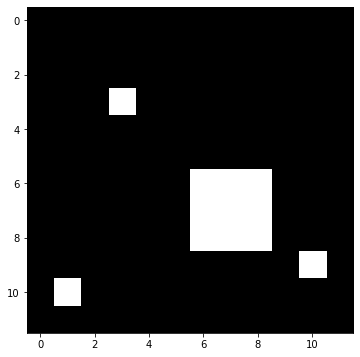

Coloring black pixel @ 3, 3


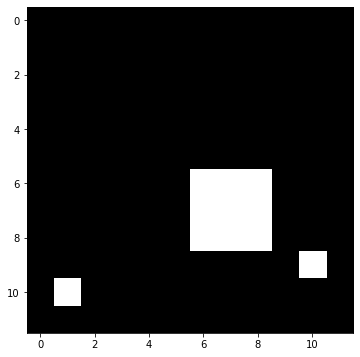

Coloring black pixel @ 6, 6


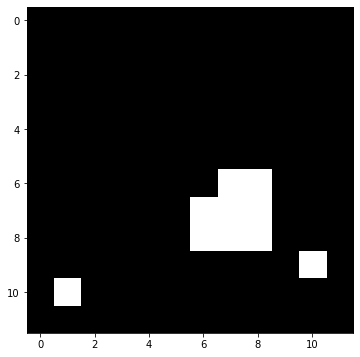

Coloring black pixel @ 7, 6


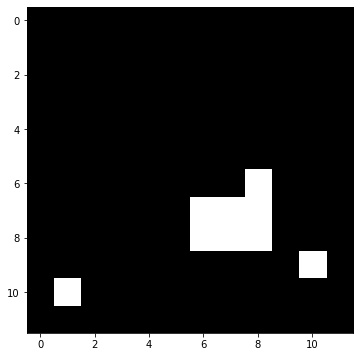

Coloring black pixel @ 8, 6


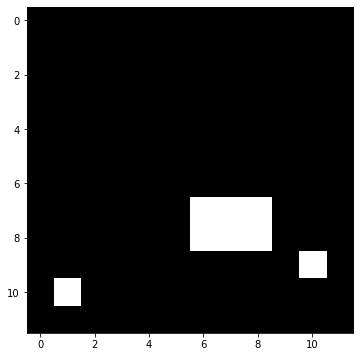

Coloring black pixel @ 6, 7


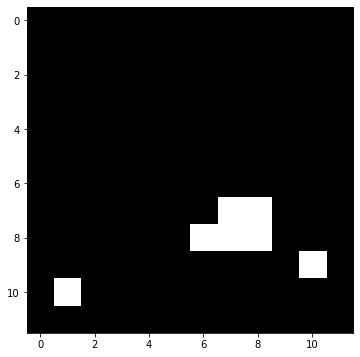

Coloring black pixel @ 8, 7


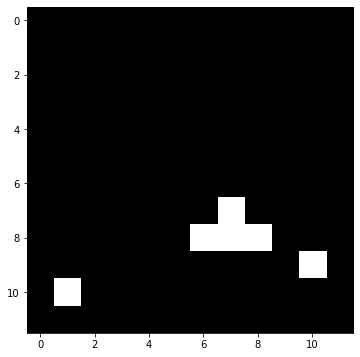

Coloring black pixel @ 6, 8


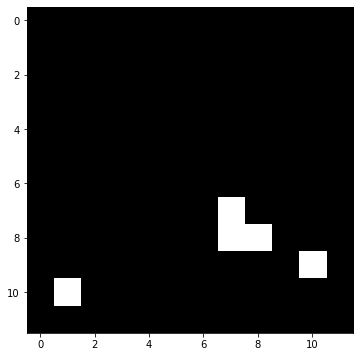

Coloring black pixel @ 7, 8


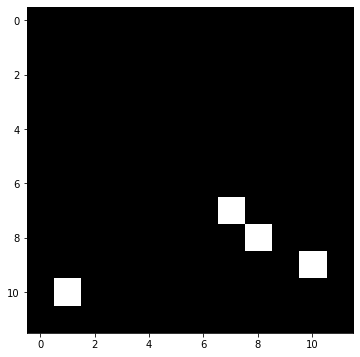

Coloring black pixel @ 8, 8


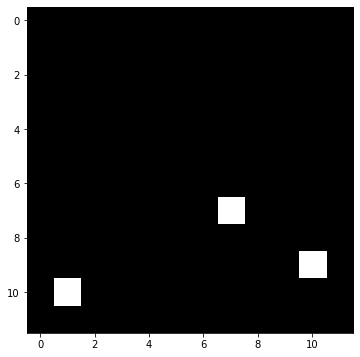

Coloring black pixel @ 10, 9


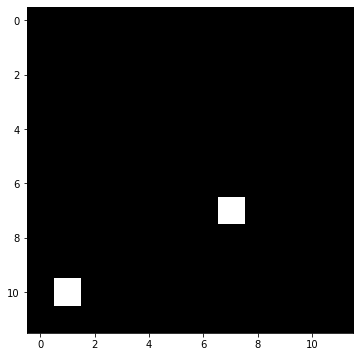

Coloring black pixel @ 1, 10


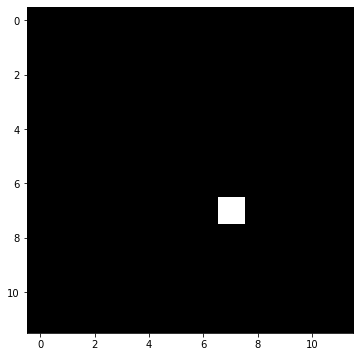

Final Padded Picture


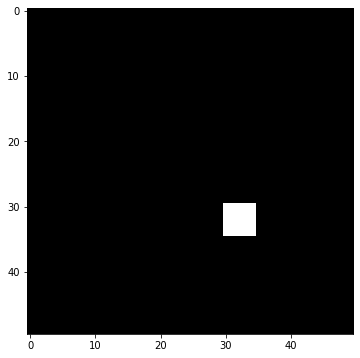

In [13]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
paddedDilatedIm = paddedIm.copy()

target_heigth, target_width = 50, 50

# Create a VideoWriter object
codec = cv2.VideoWriter_fourcc('M','J','P','G')
# codec = cv2.VideoWriter_fourcc(*'mp4v')
# codec = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')

width_vieo, height_video = (target_width, target_heigth)
fps = 10
out = cv2.VideoWriter('erosionScratch.avi', codec, fps, (width_vieo, height_video))

for h_i in range(border, height+border):        # from 1 to 11
    for w_i in range(border, width+border):     # from 1 to 11
        
        top = paddedIm[h_i-1, w_i]
        right = paddedIm[h_i, w_i+1]
        buttom = paddedIm[h_i+1, w_i]
        left = paddedIm[h_i, w_i-1]
        
        if (min(top, right, buttom, left) == 0) and (paddedDilatedIm[h_i, w_i] != 0):
            print('Coloring black pixel @ {}, {}'.format(w_i, h_i))
            paddedDilatedIm[h_i, w_i] = 0
            plt.imshow(paddedDilatedIm)
            plt.show()

        # Select the frame (without borders)
        image = paddedDilatedIm[border:height+border, border:width+border]
        
        # Resize output to 50x50 before writing it to the video
        image = cv2.resize(image, (target_heigth, target_width), interpolation=cv2.INTER_NEAREST)
        
        # Convert resizedFrame to BGR
        image = cv2.cvtColor(image*255, cv2.COLOR_GRAY2BGR)    
        
        # Write out the array
        out.write(image)            

# Release the VideoWriter object
print('Final Padded Picture')
plt.imshow(image)
plt.show()
out.release()

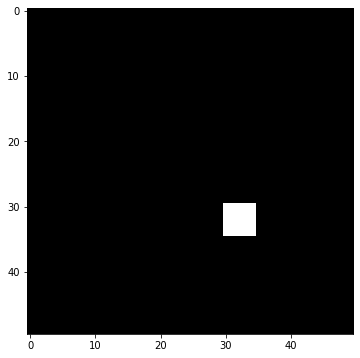

In [14]:
# Display final image (cropped)
plt.imshow(image)
plt.show()